In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [59]:
df=pd.read_excel('day3.xlsx')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [60]:
# independent variable
x = df.iloc[:,:-1].values
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [61]:
# dependent column
y = df.iloc[:,3].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

# handling missing values

In [62]:
# simple imputer is scikit learn class which is helpful in handling the missing data in the predictive 

In [63]:
# simple imputer
# to handle missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer = imputer.fit(x[:,1:3])
x[:,1:3] = imputer.transform(x[:,1:3])
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

# encoding categorical data

In [64]:
# LabelEncoder: encoding the levels of categorical features into numerical values

In [65]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_x = LabelEncoder()
x[:,0] = LabelEncoder_x.fit_transform(x[:,0])
x

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [66]:
# One hot encoder:- encode categorical data using one-hot-k method.

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('encoder',OneHotEncoder(),[0])], remainder='passthrough')
x = np.array(ct.fit_transform(x),dtype=np.str_)
x

array([['1.0', '0.0', '0.0', '44.0', '72000.0'],
       ['0.0', '0.0', '1.0', '27.0', '48000.0'],
       ['0.0', '1.0', '0.0', '30.0', '54000.0'],
       ['0.0', '0.0', '1.0', '38.0', '61000.0'],
       ['0.0', '1.0', '0.0', '40.0', '63777.77777777778'],
       ['1.0', '0.0', '0.0', '35.0', '58000.0'],
       ['0.0', '0.0', '1.0', '38.77777777777778', '52000.0'],
       ['1.0', '0.0', '0.0', '48.0', '79000.0'],
       ['0.0', '1.0', '0.0', '50.0', '83000.0'],
       ['1.0', '0.0', '0.0', '37.0', '67000.0']], dtype='<U17')

# step-5 splitting the dataset into training sets and test sets

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=1/4, random_state=0)
x_train,x_test,y_train,y_test

(array([['1.0', '0.0', '0.0', '37.0', '67000.0'],
        ['0.0', '0.0', '1.0', '27.0', '48000.0'],
        ['0.0', '0.0', '1.0', '38.77777777777778', '52000.0'],
        ['1.0', '0.0', '0.0', '48.0', '79000.0'],
        ['0.0', '0.0', '1.0', '38.0', '61000.0'],
        ['1.0', '0.0', '0.0', '44.0', '72000.0'],
        ['1.0', '0.0', '0.0', '35.0', '58000.0']], dtype='<U17'),
 array([['0.0', '1.0', '0.0', '30.0', '54000.0'],
        ['0.0', '1.0', '0.0', '50.0', '83000.0'],
        ['0.0', '1.0', '0.0', '40.0', '63777.77777777778']], dtype='<U17'),
 array(['Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes'], dtype=object),
 array(['No', 'No', 'Yes'], dtype=object))

In [69]:
# in using one hot encoder we modified country column into 0,1,2 as 3 different columns

# step-6 Feature scaling

In [70]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test= scale.fit_transform(x_test)

In [71]:
x_test

array([[ 0.        ,  0.        ,  0.        , -1.22474487, -1.07298811],
       [ 0.        ,  0.        ,  0.        ,  1.22474487,  1.33431759],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.26132948]])

In [72]:
x_train

array([[ 0.8660254 ,  0.        , -0.8660254 , -0.2029809 ,  0.44897083],
       [-1.15470054,  0.        ,  1.15470054, -1.82168936, -1.41706417],
       [-1.15470054,  0.        ,  1.15470054,  0.08478949, -1.0242147 ],
       [ 0.8660254 ,  0.        , -0.8660254 ,  1.5775984 ,  1.62751925],
       [-1.15470054,  0.        ,  1.15470054, -0.04111006, -0.14030338],
       [ 0.8660254 ,  0.        , -0.8660254 ,  0.93011502,  0.94003267],
       [ 0.8660254 ,  0.        , -0.8660254 , -0.52672259, -0.43494049]])

In [73]:
df=pd.read_csv('Day32.csv')
df

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13
...,...,...,...,...,...,...,...,...
438,26945,other,12963,0,10330,2001-11-26,2004-06-11,2.46
439,26945,credit,1728,1,10248,2004-01-27,2005-06-21,5.27
440,26945,other,9329,0,10154,2001-12-17,2004-07-22,5.65
441,26945,home,4197,0,10333,2003-10-16,2005-07-10,4.50


In [74]:
df.shape

(443, 8)

In [75]:
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [76]:
df.dtypes

client_id        int64
loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

In [77]:
# converting data type object to data type
# conert load_id to object datatype
df['loan_id'] = df['loan_id'].astype('object')

In [78]:
df.isnull().sum()

client_id      0
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

In [79]:
# convert repaid to category
df['repaid'] = df['repaid'].astype('category')

In [80]:
# convert loan_start and loan_end to date type
df['loan_start'] = pd.to_datetime(df['loan_start'],format='%Y-%m-%d')

In [81]:
df['loan_end'] = pd.to_datetime(df['loan_end'],format='%Y-%m-%d')

In [82]:
df.dtypes

client_id               int64
loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

In [83]:
df.describe()

,client_id,loan_amount,loan_start,loan_end,rate
count,443.000000,443.000000,443,443,443.000000
mean,38911.060948,7982.311512,2007-08-02 12:56:53.092550912,2009-08-23 11:35:37.246049536,3.217156
min,25707.000000,559.000000,2000-01-26 00:00:00,2001-08-02 00:00:00,0.010000
25%,32885.000000,4232.500000,2003-10-19 00:00:00,2005-09-12 12:00:00,1.220000
50%,39505.000000,8320.000000,2007-03-10 00:00:00,2009-03-19 00:00:00,2.780000
75%,46109.000000,11739.000000,2011-07-31 00:00:00,2013-09-11 12:00:00,4.750000
max,49624.000000,14971.000000,2014-11-11 00:00:00,2017-05-07 00:00:00,12.620000
std,7768.681063,4172.891992,NaN,NaN,2.397168


In [84]:
df.isnull().sum()

client_id      0
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

In [85]:
import matplotlib.pyplot as plt

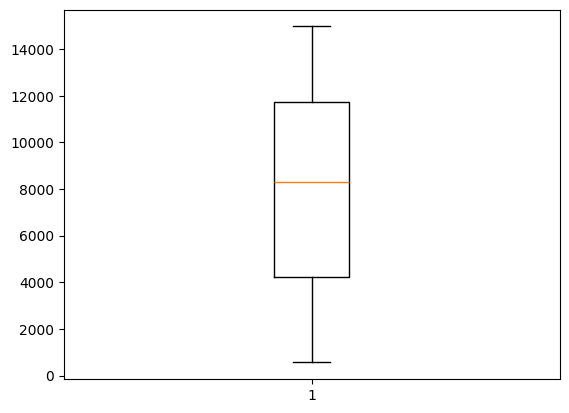

In [86]:
plt.boxplot(df.loan_amount)
plt.show()

<Axes: >

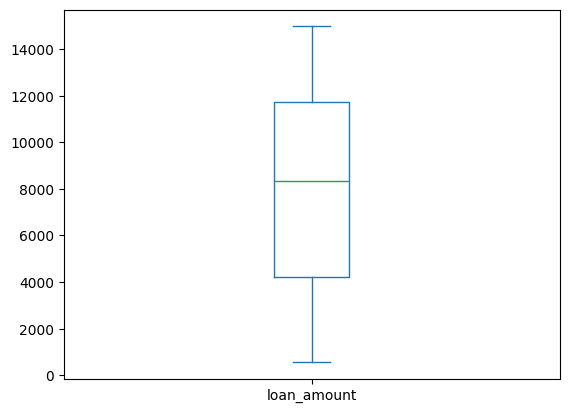

In [87]:
df['loan_amount'].plot(kind='box')

<Axes: >

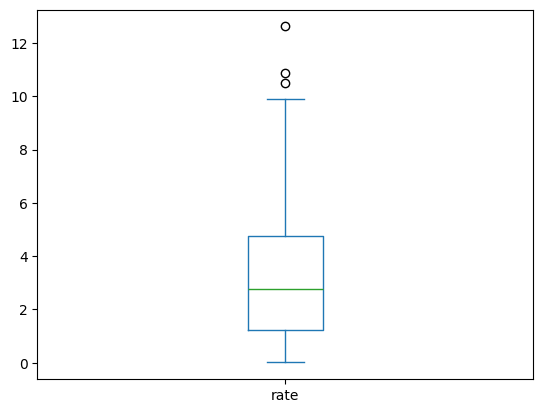

In [88]:
df['rate'].plot(kind='box')

In [89]:
df1=df[['loan_amount','rate']]
df1

,loan_amount,rate
0,13672,2.15
1,9794,1.25
2,12734,0.68
3,12518,1.24
4,14049,3.13
...,...,...
438,12963,2.46
439,1728,5.27
440,9329,5.65
441,4197,4.50


In [90]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test= scale.fit_transform(x_test)

In [91]:
scale=StandardScaler()
df1=scale.fit_transform(df1)
df1

array([[ 1.36502962e+00, -4.45676908e-01],
       [ 4.34647423e-01, -8.21544457e-01],
       [ 1.13999132e+00, -1.05959390e+00],
       [ 1.08817014e+00, -8.25720763e-01],
       [ 1.45547678e+00, -3.63989115e-02],
       [-2.51263533e-01, -5.33379336e-01],
       [-4.33117505e-01,  2.61555546e+00],
       [ 1.12127812e+00,  3.85408004e-01],
       [ 7.38856969e-01,  9.45033020e-01],
       [-9.43412224e-01,  4.35523677e-01],
       [-1.52688038e+00,  1.36683993e+00],
       [ 1.01648330e-01, -1.13476741e+00],
       [ 2.57831622e-01, -9.84420394e-01],
       [-1.06960640e+00,  1.15384832e+00],
       [ 6.88715175e-01, -1.65864400e-01],
       [-1.54338725e-01, -8.04839232e-01],
       [ 9.52619355e-01,  3.45982920e-02],
       [ 5.00143642e-01, -4.05752176e-02],
       [ 9.66054477e-01, -1.01365454e+00],
       [-1.78094813e+00,  3.89584310e-01],
       [ 1.20620728e+00, -5.33379336e-01],
       [-9.91154890e-01, -1.00530192e+00],
       [ 1.04767198e-01, -9.96949312e-01],
       [ 9.

In [95]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['loan_type']= label.fit_transform(df['loan_type'])
df

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,2,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,1,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,2,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,0,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,1,14049,1,11415,2010-07-07,2012-05-21,3.13
...,...,...,...,...,...,...,...,...
438,26945,3,12963,0,10330,2001-11-26,2004-06-11,2.46
439,26945,1,1728,1,10248,2004-01-27,2005-06-21,5.27
440,26945,3,9329,0,10154,2001-12-17,2004-07-22,5.65
441,26945,2,4197,0,10333,2003-10-16,2005-07-10,4.50
